In [1]:
# import the necessary packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data
data = pd.read_csv('hepsiemlak_cleaned.csv')

In [3]:
# see the information of the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5743 entries, 0 to 5742
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          5743 non-null   object
 1   district      5743 non-null   object
 2   neighborhood  5743 non-null   object
 3   room          5743 non-null   int64 
 4   salon         5743 non-null   int64 
 5   area          5743 non-null   int64 
 6   age           5743 non-null   int64 
 7   floor         5743 non-null   int64 
 8   price         5743 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 403.9+ KB
None


In [4]:
# fix the column types
data['city'] = data['city'].astype('category')
data['district'] = data['district'].astype('category')
data['neighborhood'] = data['neighborhood'].astype('category')
data['room'] = data['room'].astype('int')
data['salon'] = data['salon'].astype('int')
data['area'] = data['area'].astype('int')
data['age'] = data['age'].astype('int')
data['floor'] = data['floor'].astype('int')
data['price'] = data['price'].astype('int')

In [5]:
# see the information and description of the data
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5743 entries, 0 to 5742
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   city          5743 non-null   category
 1   district      5743 non-null   category
 2   neighborhood  5743 non-null   category
 3   room          5743 non-null   int64   
 4   salon         5743 non-null   int64   
 5   area          5743 non-null   int64   
 6   age           5743 non-null   int64   
 7   floor         5743 non-null   int64   
 8   price         5743 non-null   int64   
dtypes: category(3), int64(6)
memory usage: 315.8 KB
None
              room   salon         area          age        floor  \
count  5743.000000  5743.0  5743.000000  5743.000000  5743.000000   
mean      2.146439     1.0   102.637646    12.776772     2.385687   
std       0.817333     0.0    37.994905    10.523330     1.559273   
min       1.000000     1.0     5.000000     0.000000    -2.000000   
25%    

array([[<Axes: title={'center': 'room'}>,
        <Axes: title={'center': 'salon'}>],
       [<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

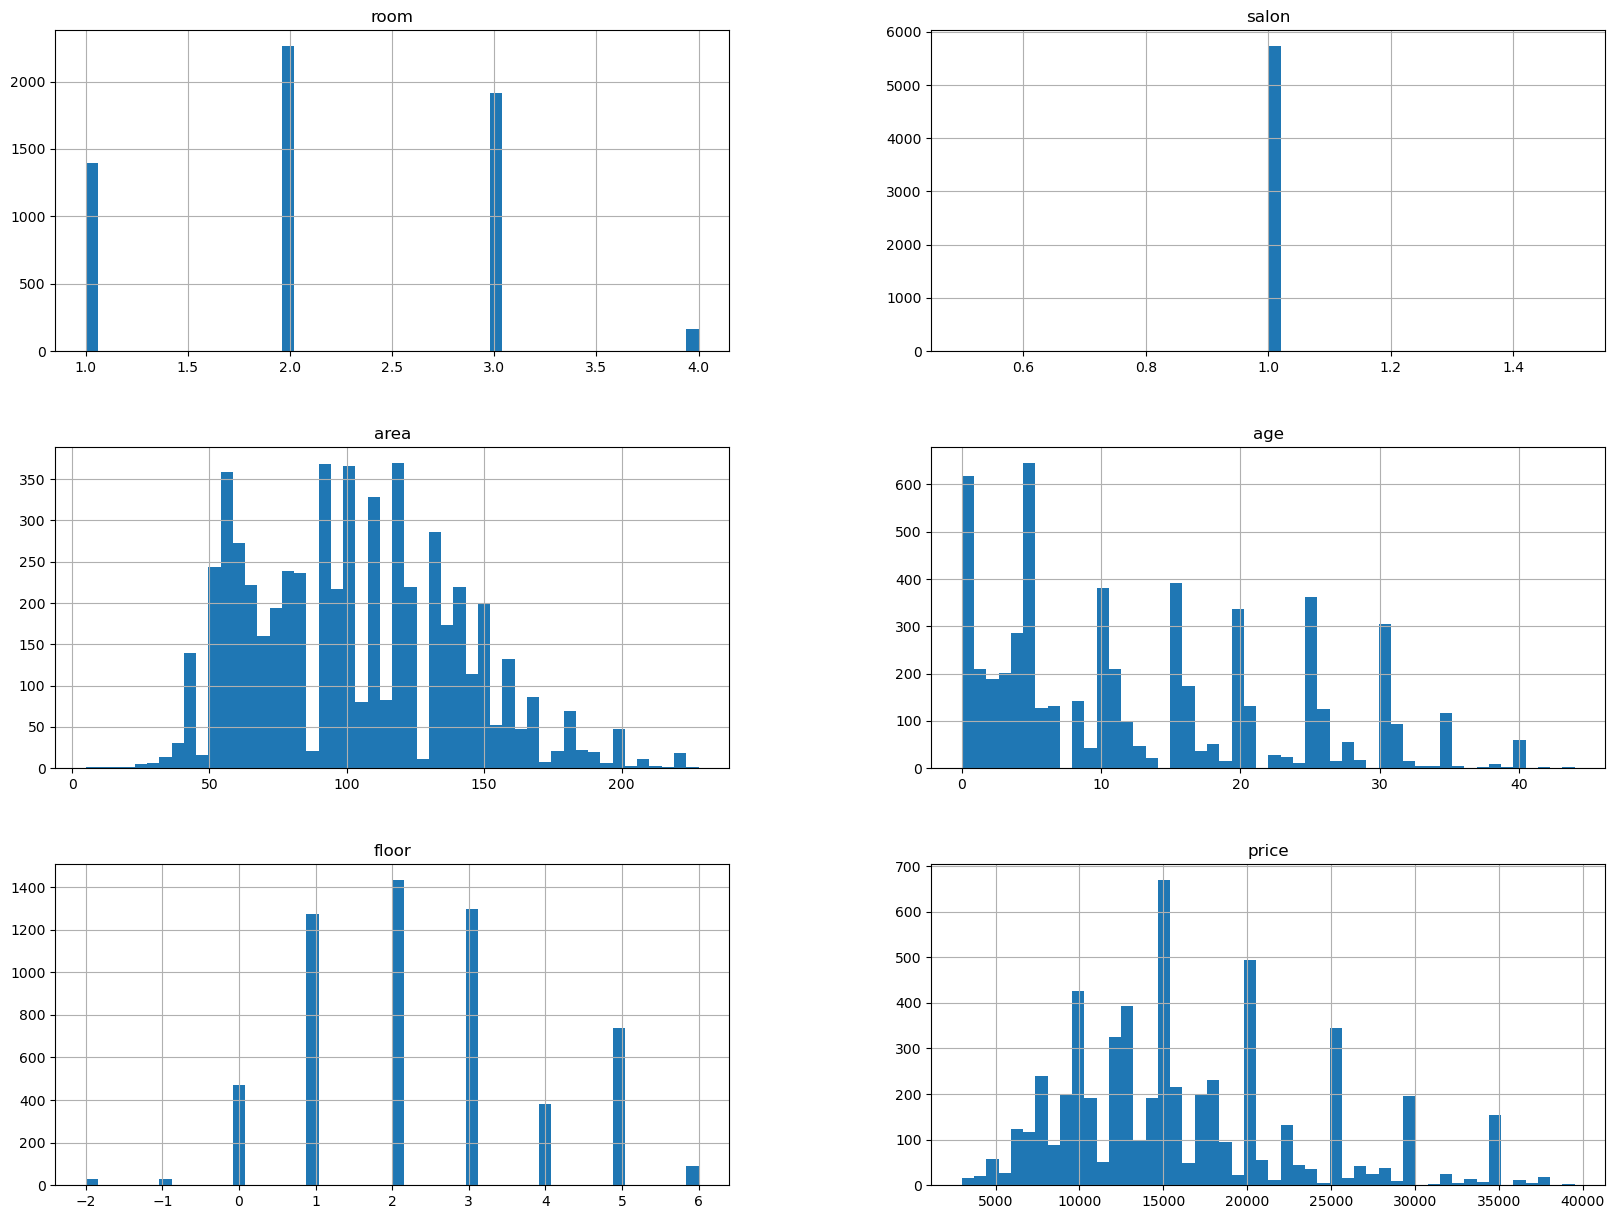

In [6]:
# see the histogram of the data
data.hist(bins=50, figsize=(20,15))

In [46]:
# import the packages for the machine learning
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [47]:
# create the pipeline for the numerical attributes
numerical_features = ['room', 'salon', 'area', 'age', 'floor']

In [48]:
# create the pipeline for the categorical attributes
categorical_features = ['city', 'district', 'neighborhood']

In [49]:
# create the full pipeline
full_pipeline = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [50]:
# prepare the data
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# prepare the data for the pipeline
model = Pipeline([
    ('preparation', full_pipeline),
    ('model', LinearRegression())
])

In [52]:
# train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['room', 'salon', 'area',
                                                   'age', 'floor']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['city', 'district',
                                                   'neighborhood'])])),
                ('model', LinearRegression())])

In [53]:
# evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('Linear Regression')
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R^2 Score:', r2)

Linear Regression
Mean Squared Error: 23483910.05782811
Root Mean Squared Error: 4846.020022433679
R^2 Score: 0.5487989280661039


In [54]:
# example predictions
new_data = pd.DataFrame({
    'city': ['İstanbul'],
    'district': ['Ümraniye'],
    'neighborhood': ['Çakmak'],
    'room': [3],
    'salon': [1],
    'area': [120],
    'age': [5],
    'floor': [3]
})

print(model.predict(new_data))

[14853.25352664]


In [55]:
# show the feature importances of the linear regression
if hasattr(model.named_steps['model'], 'coef_'):
    feature_importances = model.named_steps['model'].coef_
    # print the feature names and their importances
    print('Linear Regression Feature Importances')
    print('Intercept:', feature_importances[0])
    print('Numerical Features')
    for i in range(len(numerical_features)):
        print(numerical_features[i], feature_importances[i])
    print('Categorical Features')
    for i in range(len(categorical_features)):
        for j in range(len(model.named_steps['preparation'].transformers_[1][1].categories_[i])):
            print(model.named_steps['preparation'].transformers_[1][1].categories_[i][j], feature_importances[len(numerical_features) + j])

Linear Regression Feature Importances
Intercept: 771.5620960621449
Numerical Features
room 771.5620960621449
salon 0.0
area 2247.87758640868
age -1675.0068615793864
floor 25.21422065651677
Categorical Features
afyonkarahisar -5947.650212791144
aydin 741.6615743844351
denizli -3227.5218100322377
izmir 5840.713472146726
manisa -738.085412469458
mugla 3330.882388654905
acipayam -5947.650212791144
akhisar 741.6615743844351
alasehir -3227.5218100322377
aliaga 5840.713472146726
balcova -738.085412469458
bayindir 3330.882388654905
bayrakli -1242.1576462242238
bergama -1217.1560165220292
bodrum -2155.9473839081943
bolvadin 2848.7700436761943
bornova 5343.324995579113
buca -8422.375318811604
buharkent -4062.2651511412273
cameli -6003.860895408722
cardak 12305.87498753462
cay -406.9137879244706
cesme -1788.2093823585283
cigli -2536.691387619584
cine -2345.8087991023226
civril 2462.82729018898
dalaman -734.6896895634925
datca -5838.772129522227
demirci 4768.6171671081365
didim -3633.135000636824


In [56]:
# import the packages for regularization
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [57]:
lasso_model = Pipeline([
    ('preparation', full_pipeline),
    ('model', Lasso(alpha=2.0))
])
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print('Lasso Regression')
print('Mean Squared Error:', mse_lasso)
print('Root Mean Squared Error:', rmse_lasso)
print('R^2 Score:', r2_lasso)

Lasso Regression
Mean Squared Error: 21718709.028799184
Root Mean Squared Error: 4660.333574841954
R^2 Score: 0.5827140893197204


In [58]:
ridge_model = Pipeline([
    ('preparation', full_pipeline),
    ('model', Ridge(alpha=1.5))
])
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print('Ridge Regression')
print('Mean Squared Error:', mse_ridge)
print('Root Mean Squared Error:', rmse_ridge)
print('R^2 Score:', r2_ridge)

Ridge Regression
Mean Squared Error: 21359584.706131373
Root Mean Squared Error: 4621.643074289854
R^2 Score: 0.5896140169274415


In [59]:
elasticnet_model = Pipeline([
    ('preparation', full_pipeline),
    ('model', ElasticNet(alpha=0.1, l1_ratio=0.5))
])
elasticnet_model.fit(X_train, y_train)
y_pred_elasticnet = elasticnet_model.predict(X_test)
mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
rmse_elasticnet = np.sqrt(mse_elasticnet)
r2_elasticnet = r2_score(y_test, y_pred_elasticnet)
print('ElasticNet Regression')
print('Mean Squared Error:', mse_elasticnet)
print('Root Mean Squared Error:', rmse_elasticnet)
print('R^2 Score:', r2_elasticnet)

ElasticNet Regression
Mean Squared Error: 30939955.809509464
Root Mean Squared Error: 5562.369621798741
R^2 Score: 0.4055444262705058


In [60]:
# decision tree regression
decision_tree_model = Pipeline([
    ('preparation', full_pipeline),
    ('model', DecisionTreeRegressor(random_state=42))
])
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
rmse_decision_tree = np.sqrt(mse_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)
print('Decision Tree Regression')
print('Mean Squared Error:', mse_decision_tree)
print('Root Mean Squared Error:', rmse_decision_tree)
print('R^2 Score:', r2_decision_tree)

Decision Tree Regression
Mean Squared Error: 36385883.56841698
Root Mean Squared Error: 6032.071250276888
R^2 Score: 0.3009107244532673


In [61]:
# random forest regression
random_forest_model = Pipeline([
    ('preparation', full_pipeline),
    ('model', RandomForestRegressor(random_state=42))
])
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
rmse_random_forest = np.sqrt(mse_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)
print('Random Forest Regression')
print('Mean Squared Error:', mse_random_forest)
print('Root Mean Squared Error:', rmse_random_forest)
print('R^2 Score:', r2_random_forest)

Random Forest Regression
Mean Squared Error: 21318300.202302657
Root Mean Squared Error: 4617.174482549111
R^2 Score: 0.590407224376112


In [62]:
# gradient boosting regression
gradient_boosting_model = Pipeline([
    ('preparation', full_pipeline),
    ('model', GradientBoostingRegressor(random_state=42))
])
gradient_boosting_model.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)
mse_gradient_boosting = mean_squared_error(y_test, y_pred_gradient_boosting)
rmse_gradient_boosting = np.sqrt(mse_gradient_boosting)
r2_gradient_boosting = r2_score(y_test, y_pred_gradient_boosting)
print('Gradient Boosting Regression')
print('Mean Squared Error:', mse_gradient_boosting)
print('Root Mean Squared Error:', rmse_gradient_boosting)
print('R^2 Score:', r2_gradient_boosting)

Gradient Boosting Regression
Mean Squared Error: 25639341.410158403
Root Mean Squared Error: 5063.530528214321
R^2 Score: 0.507386193378544


In [63]:
# support vector regression
support_vector_model = Pipeline([
    ('preparation', full_pipeline),
    ('model', SVR(kernel='linear'))
])
support_vector_model.fit(X_train, y_train)
y_pred_support_vector = support_vector_model.predict(X_test)
mse_support_vector = mean_squared_error(y_test, y_pred_support_vector)
rmse_support_vector = np.sqrt(mse_support_vector)
r2_support_vector = r2_score(y_test, y_pred_support_vector)
print('Support Vector Regression')
print('Mean Squared Error:', mse_support_vector)
print('Root Mean Squared Error:', rmse_support_vector)
print('R^2 Score:', r2_support_vector)

Support Vector Regression
Mean Squared Error: 46613674.49776459
Root Mean Squared Error: 6827.420779310778
R^2 Score: 0.10440212688694639


In [69]:
# cross validation to tune the hyperparameters
param_grid = [
    {'model__n_estimators': [3, 10, 30, 50, 100, 200, 500, 1000], 'model__max_features': [2, 4, 6, 8, 10, 12]},
    {'model__bootstrap': [False], 'model__n_estimators': [3, 10], 'model__max_features': [2, 3, 4]}
]

In [70]:
# random forest regression
grid_search = GridSearchCV(random_forest_model, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)
print('Random Forest Regression Best Parameters:', grid_search.best_params_)
print('Random Forest Regression Best Estimator:', grid_search.best_estimator_)
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)
# calculate the mse and r2 for the best estimator
y_pred_random_forest_best = grid_search.best_estimator_.predict(X_test)
mse_random_forest_best = mean_squared_error(y_test, y_pred_random_forest_best)
rmse_random_forest_best = np.sqrt(mse_random_forest_best)
r2_random_forest_best = r2_score(y_test, y_pred_random_forest_best)
print('Random Forest Regression Best Estimator')
print('Mean Squared Error:', mse_random_forest_best)
print('Root Mean Squared Error:', rmse_random_forest_best)
print('R^2 Score:', r2_random_forest_best)

Random Forest Regression Best Parameters: {'model__max_features': 12, 'model__n_estimators': 500}
Random Forest Regression Best Estimator: Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['room', 'salon', 'area',
                                                   'age', 'floor']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['city', 'district',
                                                   'neighborhood'])])),
                ('model',
                 RandomForestRegressor(max_features=12, n_estimators=500,
                                       random_state=42))])
5370.806459134075 {'model__max_features': 2, 'model__n_estimators': 3}
4822.407417850289 {'model__max_features': 2, 'model__n_estimators': 10}
4665.797786665013

In [71]:
# gradient boosting regression
param_grid = [
    {'model__n_estimators': [3, 10, 30, 50, 100, 200, 500, 1000], 'model__learning_rate': [0.01, 0.03, 0.1, 0.3, 1.0], 'model__max_depth': [2, 3, 4, 5, 6, 7, 8]}
]
grid_search = GridSearchCV(gradient_boosting_model, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)
print('Gradient Boosting Regression Best Parameters:', grid_search.best_params_)
print('Gradient Boosting Regression Best Estimator:', grid_search.best_estimator_)
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)
# calculate the mse and r2 for the best estimator
y_pred_gradient_boosting_best = grid_search.best_estimator_.predict(X_test)
mse_gradient_boosting_best = mean_squared_error(y_test, y_pred_gradient_boosting_best)
rmse_gradient_boosting_best = np.sqrt(mse_gradient_boosting_best)
r2_gradient_boosting_best = r2_score(y_test, y_pred_gradient_boosting_best)
print('Gradient Boosting Regression Best Estimator')
print('Mean Squared Error:', mse_gradient_boosting_best)
print('Root Mean Squared Error:', rmse_gradient_boosting_best)
print('R^2 Score:', r2_gradient_boosting_best)

Gradient Boosting Regression Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 500}
Gradient Boosting Regression Best Estimator: Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['room', 'salon', 'area',
                                                   'age', 'floor']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['city', 'district',
                                                   'neighborhood'])])),
                ('model',
                 GradientBoostingRegressor(max_depth=5, n_estimators=500,
                                           random_state=42))])
7061.547658060241 {'model__learning_rate': 0.01, 'model__max_depth': 2, 'model__n_estimators': 3}
6954.02349497845 {'model_